In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
def detect_anomaly(l):
    l_diff = [l[i]-l[i-1] for i in range(1, len(l))]
    for i in range(1, len(l_diff)):
        if l_diff[i] > 10 * l_diff[i-1]:
            return False
    return True

In [57]:
def adjust(l):
    l_diff = [l[i]-l[i-1] for i in range(1, len(l))]
    for i in range(1, len(l_diff)):
        if l_diff[i] > 10 * l_diff[i-1]:
            l_diff[i] = (sum(l_diff[i-2:i]) + sum(l_diff[i+1:i+3])) / 4
    l_new = [l[0] for _ in l]
    for i in range(1, len(l)):
        l_new[i] = l_new[i-1] + l_diff[i-1]
    return l_new

In [67]:
anomalies = []
for history_file in os.listdir('./results'):
    if not history_file.endswith('.npz'):
        continue
    history = np.load('./results/{}'.format(history_file))
    if 'time' in history:
        time_history = history['time']
        if not detect_anomaly(time_history):
            anomalies.append(history_file)

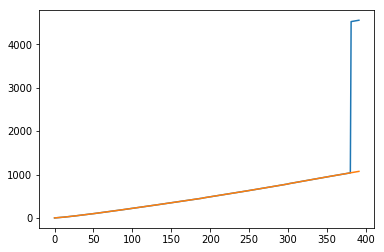

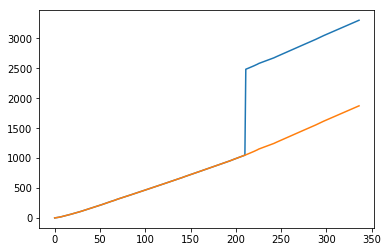

In [63]:
for history_file in anomalies:
    history = np.load('./results/{}'.format(history_file))
    plt.plot(history['time'])
#     plt.show()
    plt.plot(adjust(history['time']))
    plt.show()

In [68]:
anomalies

[]

In [66]:
anomalies

['scale_free_64_1_WassR2_5_old.npz', 'scale_free_64_3_WassR2_40_old.npz']

In [65]:
for history_file in ['scale_free_64_1_WassR2_5.npz', 'scale_free_64_3_WassR2_40.npz']:
    history = np.load('./results/{}'.format(history_file)

In [69]:
history_file = 'scale_free_64_1_WassR2_5.npz'
history = np.load('./results/{}'.format(history_file))

In [71]:
history['embeddings']

array([[[-2.11125919e+00, -5.11880721e-01],
        [ 3.12805492e+00,  9.73662693e-01],
        [-2.09485925e+00, -5.01862956e-01],
        [-1.23726370e+00,  1.67952736e+00],
        [ 3.12793464e+00,  9.74896768e-01]],

       [[-1.65912278e+00,  1.22347177e+00],
        [-1.65934013e+00,  1.22362246e+00],
        [ 3.30646138e+00,  2.32542649e+00],
        [ 2.96038050e+00, -2.61524343e-01],
        [-2.51441285e+00, -1.82292349e+00]],

       [[-2.46129012e+00, -1.29934576e+00],
        [-4.84087578e+00, -1.78897168e+00],
        [-1.15633564e+00,  1.16803362e+00],
        [ 3.05530776e+00,  7.21889122e-01],
        [ 3.25374010e+00,  2.29529641e+00]],

       [[ 3.10895471e+00, -2.28331313e-01],
        [-1.68055990e+00,  1.23412789e+00],
        [ 7.59596844e-01, -1.12179804e+00],
        [-2.59493836e+00, -2.18357058e+00],
        [ 3.38608455e+00,  6.71267909e-01]],

       [[ 1.92137295e+00,  2.02961555e+00],
        [-1.75773811e+00,  9.49434652e-01],
        [-1.76230995e+00